# Классы и объекты

### Классы - определенная сущность описывающая какие-либо свойства и методы определенного представления
### Объект - это конретный предмет который характерезует описаную сущность с которым мы можем взаимодействовать. Экземпляр класса(объект класса) *имя*

Синтаксис описания класса

```python
class <NameOfClass>:
    def __init__(self):
        self.<attribute> = ...

```

Свойство - или Атрибут класса, это определенная еденица характеристики объекта.

ЛЮБОЙ класс, создавемый внутри Python(даже те что уже есть), были созданы от основополагающего класса `object`
Просмотреть это мы можем через обращение именно к КЛАССУ, вызывая метод `mro()`

In [2]:
class Apple: # описние сущности объекта
    pass

apple1 = Apple() # создание объекта

print(Apple.mro()) # object - оснопологающая ЛЮБОГО КЛАССА В Python
print(int.mro())

[<class '__main__.Apple'>, <class 'object'>]
[<class 'int'>, <class 'object'>]


Процесс создания экземпляра класса Aplle(например)

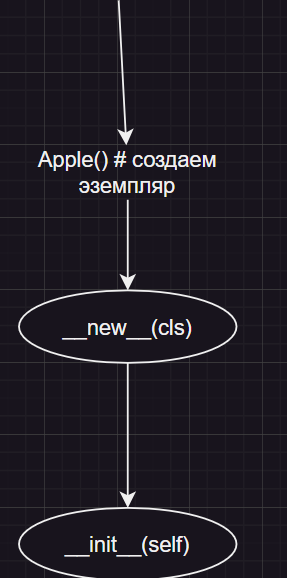

Как мы можем заметить, процесс включает в себя 2 dunder-метода - new и init.New имеет отличный от init указатель. New создает общее представление объекта, не наделяя его конкретными свойствами. Конкретными свойствами его наделит init.

self - это парамер который используется в методах класса ПО УМОЛЧАНИЮ и является УКАЗАТЕЛЕМ на собственный класс. Self- переводится "на себя\ себе\ мне". То есть это конструкт который указывает сам на себя

In [3]:
class Apple: # описние сущности объекта
    def __init__(self):
        self.size = 'normal'
        self.color = 'red'
        self.taste = 'sweet'
        self.grew = True 
        

apple1 = Apple() 
apple2 = Apple()

print(id(apple1))
print(id(apple2))
print(apple1 is apple2) # Являются ли объекты одним объектом ?


2297351135696
2297351208656
False


Метод - это определенное действие, которое привязано к объекту и не может выполненно вне его участия 

`__init__` -- это dunder(double underline) метод, который НАДЕЛЯЕТ создаваемый объект определенными свойствами. Также, такой метод во всех ЯП(Языках Программирования в дальнейшем) называется **КОНСТРУКТОРОМ** КЛАССА

`__del__` -- этот магический метод(dunder) используется в тот момент когда поисходит удаление объекта. Иными в других ЯП это **ДЕСТРУКТОР** КЛАССА

In [4]:
class Cat: 
    def __init__(self, name, color, size = 'normal'):
        self.name = name      
        self.size = size
        self.color = color
    
    def __len__(self):
        print('Вы попытались измерить длину кота')

    def __del__(self):
        print(f'Кот "{self.name}" пропал')

    def speak(self):
        print(f'Cat "{self.name}" speak: Meeeoooow')
    
    def eat(self, food):
        if food.lower() in ['fish', 'meat', 'corm']:
            print(f'Cat "{self.name}" eat {food.lower()}')
        else:
            print(f'Cat didnt ate this food')

    def run(self):
        print(f'Cat "{self.name}" is running')
        
    def jump(self, distance):
        print(f'Cat "{self.name}" is jumping on {distance} m. distance')

cat = Cat("Barsik", "red")
cat2 = Cat("Murzik", "grey")
cat3 = Cat(color="black", name="Bob")

cat.speak()
cat2.speak()
cat3.speak()
cat3.run()
del cat3


cat.run()
cat.eat('meat')
cat.eat('milk')
cat.jump(0.56)


Cat "Barsik" speak: Meeeoooow
Cat "Murzik" speak: Meeeoooow
Cat "Bob" speak: Meeeoooow
Cat "Bob" is running
Кот "Bob" пропал
Cat "Barsik" is running
Cat "Barsik" eat meat
Cat didnt ate this food
Cat "Barsik" is jumping on 0.56 m. distance


# Перегрузка операторов

Перегрузка операторов -- это изменеие поведения стандртных функций и методов взаимодействия с классом внутри нашего класса

Например __len__ в cat, должен считать длину кота, ранее этого dunder-метода там не было и соответственно выполнить len для экземпляров класса Cat было невозможно

In [5]:
class Cat: 
    def __init__(self, name, color, size = 'normal'):
        self.name = name      
        self.size = size
        self.color = color
    
    def __len__(self):
        print('Вы попытались измерить длину кота')
        return len(self.name)
    
    def __del__(self):
        print(f'Кот "{self.name}" пропал')


cat = Cat("Barsik", "red")
cat2 = Cat("Murzikkk", "grey", size='large')
print(len(cat))
print(len(cat2))

Кот "Barsik" пропал
Кот "Murzik" пропал
Вы попытались измерить длину кота
6
Вы попытались измерить длину кота
8


### Переопределения математических операций

In [10]:
class Basket:
    def __init__(self, *args):
        self.inner_items = list(args)
        self.count_of_product = len(self.inner_items)

    def test(self):
        print(id(self))

    def __len__(self):
        return self.count_of_product
    
    def __add__(self, other):
        print(type(self))
        if isinstance(other, Basket):
            b = Basket(*self.inner_items + other.inner_items)
            return b
        
    def __call__(self):
        print('Произошел вызов объекта как функции')
    
    def __str__(self):
        return f"Корзина для покупок, содержит, следующее {self.inner_items}. Количество предметов: {self.count_of_product}"


a1 = Apple()
a2 = Apple()
a3 = Apple()

b1 = Basket(a1)
b2 = Basket(a2,a3)

print(b1, type(b1))
print(b2, type(b2))

b3 = b1 + b2
# Это 2 абсолютно аналогичные строки
b3 = b1.__add__(b2)

print(b3)
print(b1)

print(b3())



Корзина для покупок, содержит, следующее [<__main__.Apple object at 0x00000216E5210750>]. Количество предметов: 1 <class '__main__.Basket'>
Корзина для покупок, содержит, следующее [<__main__.Apple object at 0x00000216E4C5BA10>, <__main__.Apple object at 0x00000216E522F890>]. Количество предметов: 2 <class '__main__.Basket'>
<class '__main__.Basket'>
<class '__main__.Basket'>
Корзина для покупок, содержит, следующее [<__main__.Apple object at 0x00000216E5210750>, <__main__.Apple object at 0x00000216E4C5BA10>, <__main__.Apple object at 0x00000216E522F890>]. Количество предметов: 3
Корзина для покупок, содержит, следующее [<__main__.Apple object at 0x00000216E5210750>]. Количество предметов: 1
Произошел вызов объекта как функции
None


Проверка на то чем является self

In [7]:
lst = [Basket(), Basket(), Basket()]
lst[1].test()
print(id(lst[1]))


print(id(b1))
b1.test()

2297351206608
2297351206608
2297350717008
2297350717008


Таким образом мы можем заметить что self является аргументом-указателем на самого себя как объект

# Пространство класса

In [17]:
class Wolf:
    total_count = 0

    def __init__(self):
        self.count = 0
    
    # def addition(self):
    #     self.total_count += 1
    
    @classmethod
    def class_addition(cls):
        cls.total_count += 1



wolf1 = Wolf()
wolf2 = Wolf()
print(wolf1.total_count, wolf1.count) # total_count будет работать, но это не совсем правильное логическое представление
print(wolf2.total_count, wolf2.count) # total_count будет работать, но это не совсем правильное логическое представление
print(Wolf.total_count) # а вот это более правильный вариант

# Таким образом мы можем и влиять на наш классовый атрибут
Wolf.total_count += 1 
print(Wolf.total_count, wolf1.total_count, wolf2.total_count)

wolf1.total_count += 1 # Такой подход, считается "ошибочным" логически
print(Wolf.total_count, wolf1.total_count, wolf2.total_count)

# wolf1.addition() # как и здесь
# print(Wolf.total_count, wolf1.total_count, wolf2.total_count)

Wolf.class_addition() # Вот уже верный подход через функцию
print(Wolf.total_count, wolf1.total_count, wolf2.total_count)

Wolf.class_addition() # Вот уже верный подход через функцию
Wolf.class_addition() # Вот уже верный подход через функцию
Wolf.class_addition() # Вот уже верный подход через функцию
print(Wolf.total_count, wolf1.total_count, wolf2.total_count)

0 0
0 0
0
1 1 1
1 2 1
2 2 2
5 2 5


Как видим при использовании self.<классовый атрибут> + <значение> получаем соотвествующую ошибку, которая МЕНЯЕТ <классовый атрибут> на объектный, и с того момента, любое использование этого атрибута будет использованием атрибута объекта А НЕ КЛАССА

Организуем стаю волков

In [26]:

class Wolf:
    total_count = 0

    def __new__(cls, *args, **kwargs):
        # print(args, kwargs)
        cls.total_count += 1
        return super().__new__(cls)
    
    def __init__(self, name, color = 'grey'):
        self.name =  name
        self.skin_color =  color


print(Wolf.total_count)
wolf1 = Wolf('Bob')
print(wolf1.name)
print(Wolf.total_count, wolf1.__class__.total_count) #* <объект>.__class__.<атрибут> - это тоже самое что и <класс>.<атрибут>
wolf2 = Wolf('Alice')
print(Wolf.total_count, wolf1.total_count, wolf2.total_count)
    


0
Bob
1 1
2 2 2


# Singleton
- паттерн(шаблон) проектирование. Когда класс не создает больше чем один объект, а при попытке создать новый ссылается на старый

In [7]:
class Singleton:
    instance = None

    def __new__(cls):
        if cls.instance:
            return cls.instance
        else:
            cls.instance = super().__init__(cls)
            return cls.instance

s1 = Singleton()
s2 = Singleton()
print(id(s1), id(s2))
print(s1 is s2)


140704319270152 140704319270152
True
